In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro
data = pd.read_csv('Vehicle.csv', header=(0))
data = data.replace('?', np.nan)
data = data.drop_duplicates()
print("Número de linhas e colunas:",data.shape)
data.head(25)


Número de linhas e colunas: (846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [40]:
data2 = data.to_numpy()
x = data2[:,1] #Circ
y = data2[:,2] # D.Circ


print("Média de X: %.3f" % (np.mean(x))) #calcula a média de x
print("Média de Y: %.3f" % (np.mean(y))) #calcula a média de y
print("Desvio Padrão de X: %.3f" % (np.std(x)))#calcula o desvio padrão de x
print("Desvio Padrão de Y: %.3f" % (np.std(y)))#calcula o desvio padrão de y   
print("Mediana de X: %.3f" % (np.median(x)))# mediana x
print("Mediana de Y: %.3f" % (np.median(y))) # mediana y
print("Variancia de X: %.3f" % (np.var(x)))# variancia de x
print("Variancia de Y: %.3f" % (np.var(y)))# variancia de y

Média de X: 44.862
Média de Y: 82.089
Desvio Padrão de X: 6.166
Desvio Padrão de Y: 15.762
Mediana de X: 44.000
Mediana de Y: 80.000
Variancia de X: 38.022
Variancia de Y: 248.447


Text(0.5, 0, 'Valores')

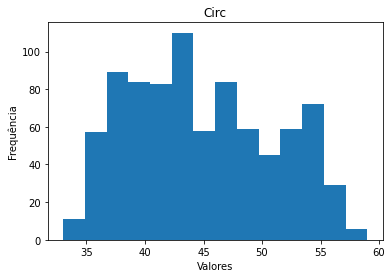

In [34]:
plt.hist(x, bins = 'auto')
plt.title('Circ')
plt.ylabel('Frequência')
plt.xlabel('Valores')


Text(0.5, 0, 'Valores')

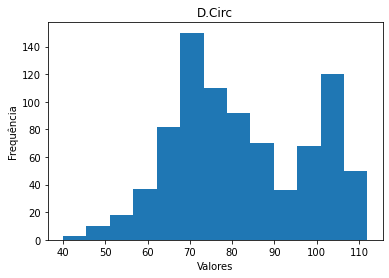

In [35]:
plt.hist(y, bins= 'auto')
plt.title('D.Circ')
plt.ylabel('Frequência')
plt.xlabel('Valores')

c:\Users\vinicius\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


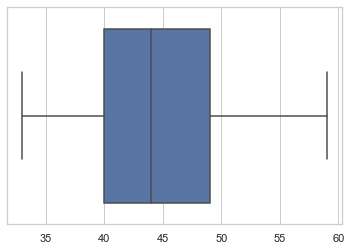

In [37]:

ax = sns.boxplot(x)
sns.set(style="whitegrid")


c:\Users\vinicius\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


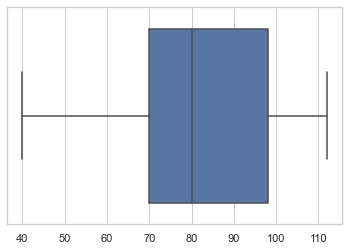

In [38]:
ax2 = sns.boxplot(y)
sns.set(style="whitegrid")

In [8]:
data.corr()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
Comp,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
Circ,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
D.Circ,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
Rad.Ra,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
Pr.Axis.Ra,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381
Max.L.Ra,0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919
Scat.Ra,0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950
Elong,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
Pr.Axis.Rect,0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
Max.L.Rect,0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


c:\Users\vinicius\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

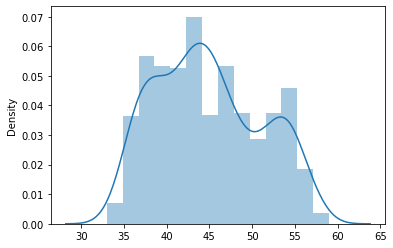

In [9]:
sns.distplot(x)

c:\Users\vinicius\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

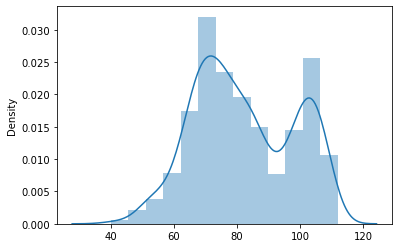

In [10]:
sns.distplot(y)

Statistics=0.964, p=0.000
Amostra não Gausssiana (rejeita H0)
stat teste 133.436
p-valor 1.0587643012210313e-29
Rejeitamos a hipotese nula: True


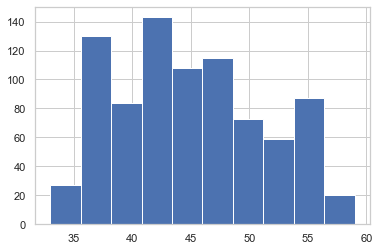

In [50]:
data3 = data.to_numpy()
x3 = data3[:,1] #Circ
y3 = data3[:,2] # D.Circ

stat, p = shapiro(x3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Amostra Gaussiana (aceita H0)')
else:
    print('Amostra não Gausssiana (rejeita H0)')
from scipy.stats import normaltest
significancia = 0.10
data.Circ.hist(bins = 10)
stat_test, p_valor = normaltest(data.Circ)
print("stat teste %.3f" % (stat_test))
print("p-valor",p_valor)
resultado=p_valor<=significancia 
print("Rejeitamos a hipotese nula:", resultado)

Statistics=0.958, p=0.0000000000
Amostra não Gausssiana (rejeita H0)
162.6185410265513
4.873404820084868e-36
Rejeitamos a hipotese nula: True


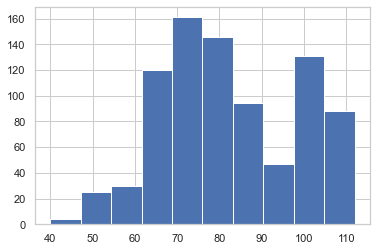

In [47]:
data3 = data.to_numpy()
x3 = data3[:,1] #Circ
y3 = data3[:,2] # D.Circ

stat2, p2 = shapiro(y3)
print('Statistics=%.3f, p=%.3f' % (stat2, p2))

alpha2 = 0.05
if p2 > alpha2:
    print('Amostra Gaussiana (aceita H0)')
else:
    print('Amostra não Gausssiana (rejeita H0)')
from scipy.stats import normaltest
significancia2 = 0.10
data['D.Circ'].hist(bins = 10)
stat_test2, p_valor2 = normaltest(data["D.Circ"])
print(stat_test2)
print(p_valor2)
resultado2=p_valor2<=significancia2 
print("Rejeitamos a hipotese nula:", resultado2)